This code analyze the daily/monthly rainfall data to prepare all India summer monsoon rainfall anomaly and % departure (https://mol.tropmet.res.in/monsoon-interannual-timeseries/).

In [277]:
reset -f

In [278]:
import warnings
warnings.filterwarnings("ignore")
import os, sys, glob
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%config Completer.use_jedi = False
# User defined
sys.path.append("/Users/suman/Data_Analysis/")
print(sys.path)
from ipynb.fs.full.Mother import *

['/Users/suman/OngoingResearch/2024/CMIP-paper/Analysis', '/Users/suman/anaconda3/envs/py37/lib/python37.zip', '/Users/suman/anaconda3/envs/py37/lib/python3.7', '/Users/suman/anaconda3/envs/py37/lib/python3.7/lib-dynload', '', '/Users/suman/anaconda3/envs/py37/lib/python3.7/site-packages', '/Users/suman/anaconda3/envs/py37/lib/python3.7/site-packages/gtool3-0.6a0-py3.7.egg', '/Users/suman/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/extensions', '/Users/suman/.ipython', '/Users/suman/OngoingResearch/2024/CMIP-paper/', '/Users/suman/Data_Analysis/', '/Users/suman/Data_Analysis/', '/Users/suman/Data_Analysis/', '/Users/suman/Data_Analysis/', '/Users/suman/Data_Analysis/', '/Users/suman/Data_Analysis/', '/Users/suman/Data_Analysis/']


IMD data are in mm/day. If you want to calculate tota JJAS rainfall in mm, do the following:
1. if data are daily and mm/day; Let's xyz.nc contains rainfall data for 2000.
        dr = xr.open_dataset('xyz.nc') # (time, lat, lon)
        dr = dr.sel(time=slice('2000-06','2000-09'))
        dr_mm = dr.mean()*122
dr_mm will give the all india total rainfall in mm of the year 2000.
2. if data are monthly and mm/day; Let's say, you did montly data from daily data using cdo
Then also the process is same as the data are still monthly.

In [279]:
def is_jjas(month):
    return (month >= 6) & (month <= 9)

# Calculated from daily data

In [280]:
path_shp_ind = '/Users/suman/OngoingResearch/2024/CMIP-paper/India_shape/India_border.shp'
indir = '/Users/suman/OngoingResearch/2024/CMIP-paper/'
dr = xr.open_dataset(indir+'IMD/IMD.rainfall.daily.25x25.1901-2022.nc')
imd_rain = dr['rain']
f_1 = add_shape_coord_from_data_array(imd_rain, path_shp_ind,'ind')
imd_rain2 = f_1.where(f_1.ind==0, other=np.nan)
imd_rain2_jjas = imd_rain2.sel(time=is_jjas(imd_rain2['time.month'])).groupby('time.year').mean(dim='time')
imd_rain2_jjas_india = imd_rain2_jjas.mean(['lat','lon'])*122
# xyz = imd_rain2.sel(time=slice('2002-06','2002-09')).mean()*122

In [282]:
imd_rain2_jjas_india_anom = ((imd_rain2_jjas_india - imd_rain2_jjas_india.mean())/imd_rain2_jjas_india.mean())*100

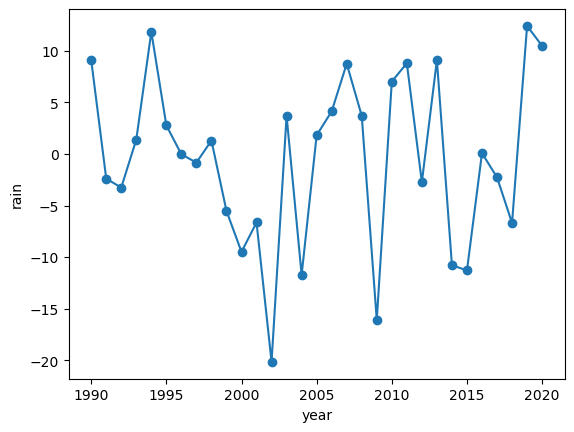

In [283]:
imd_rain2_jjas_india_anom.sel(year=slice('1990','2020')).plot(marker='o')
#imd_rain2_jjas_india.mean().values

Text(0.05, 0.2, 'Rainfall anomaly (% of mean)')

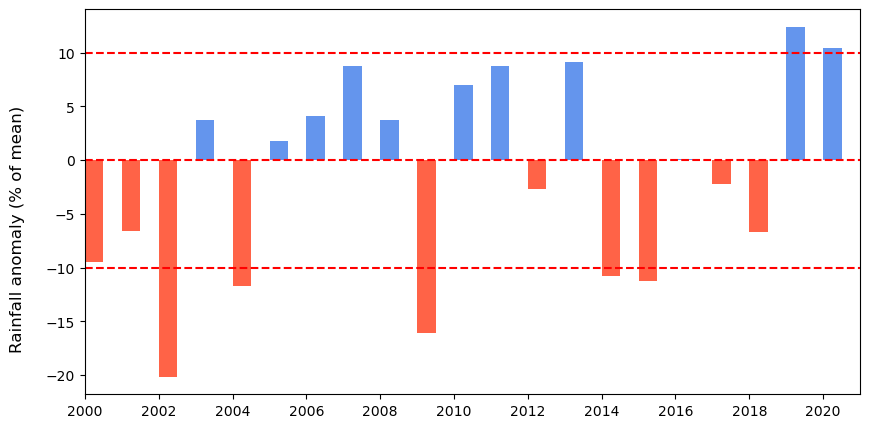

In [284]:
years = np.arange(2000,2021)
fig,ax = plt.subplots(1,1,figsize=(10,5))
xyz = imd_rain2_jjas_india_anom.sel(year=years).values
ax.bar(years[xyz<0], xyz[xyz<0],color='tomato',align='edge', width=0.5)
ax.bar(years[xyz>=0], xyz[xyz>=0],color='cornflowerblue',align='edge', width=0.5)
ax.axhline(y=0,color='r',ls='dashed')
ax.axhline(y=10,color='r',ls='dashed')
ax.axhline(y=-10,color='r',ls='dashed')
ax.set_xlim(2000,2021); ax.set_xticks(np.arange(2000,2021.1,2))
fig.text(0.05,0.2,'Rainfall anomaly (% of mean)',size=12,rotation=90)
# plt.savefig('percent_depaurture.png',dpi=300)
# plt.close()

In [209]:
imd_rain2_jjas_india_anom.sel(year=2009)

<xarray.DataArray 'rain' ()>
array(-16.26789865)
Coordinates:
    year     int64 2009

# Calculated from monthly data

In [195]:
path_shp_ind = '/Users/suman/OngoingResearch/2024/CMIP-paper/India_shape/India_border.shp'
indir = '/Users/suman/OngoingResearch/2024/CMIP-paper/'
dr = xr.open_dataset(indir+'IMD/IMD.rainfall.mon.25x25.1901-2022.nc')
imd_rain = dr['rain']
f_1 = add_shape_coord_from_data_array(imd_rain, path_shp_ind,'ind')
imd_rain2 = f_1.where(f_1.ind==0, other=np.nan)
imd_rain2_jjas = imd_rain2.sel(time=is_jjas(imd_rain2['time.month'])).groupby('time.year').mean(dim='time')
imd_rain2_jjas_india = imd_rain2_jjas.mean(['lat','lon'])*122
imd_rain2_jjas_india_anom = ((imd_rain2_jjas_india - imd_rain2_jjas_india.mean())/imd_rain2_jjas_india.mean())*100

Text(0.05, 0.2, 'Rainfall anomaly (% of mean)')

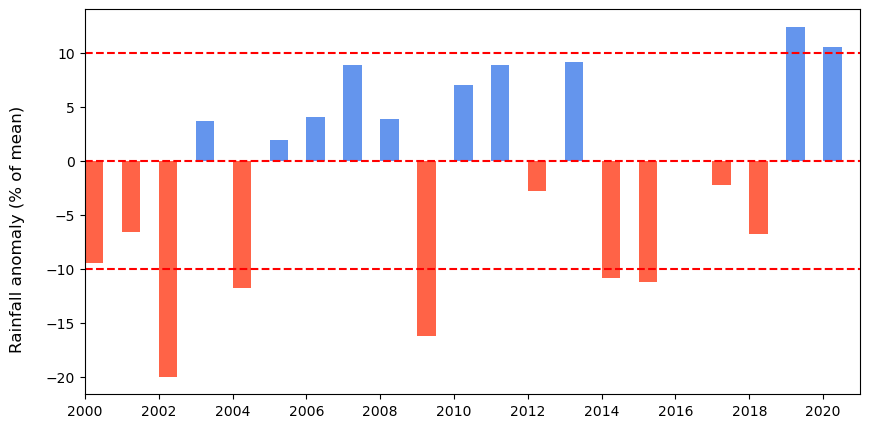

In [196]:
years = np.arange(2000,2021)
fig,ax = plt.subplots(1,1,figsize=(10,5))
xyz = imd_rain2_jjas_india_anom.sel(year=years).values
ax.bar(years[xyz<0], xyz[xyz<0],color='tomato',align='edge', width=0.5)
ax.bar(years[xyz>=0], xyz[xyz>=0],color='cornflowerblue',align='edge', width=0.5)
ax.axhline(y=0,color='r',ls='dashed')
ax.axhline(y=10,color='r',ls='dashed')
ax.axhline(y=-10,color='r',ls='dashed')
#ax.set_xlim(2000,2020); ax.set_xticklabels(years)
ax.set_xlim(2000,2021); ax.set_xticks(np.arange(2000,2021.1,2))
fig.text(0.05,0.2,'Rainfall anomaly (% of mean)',size=12,rotation=90)


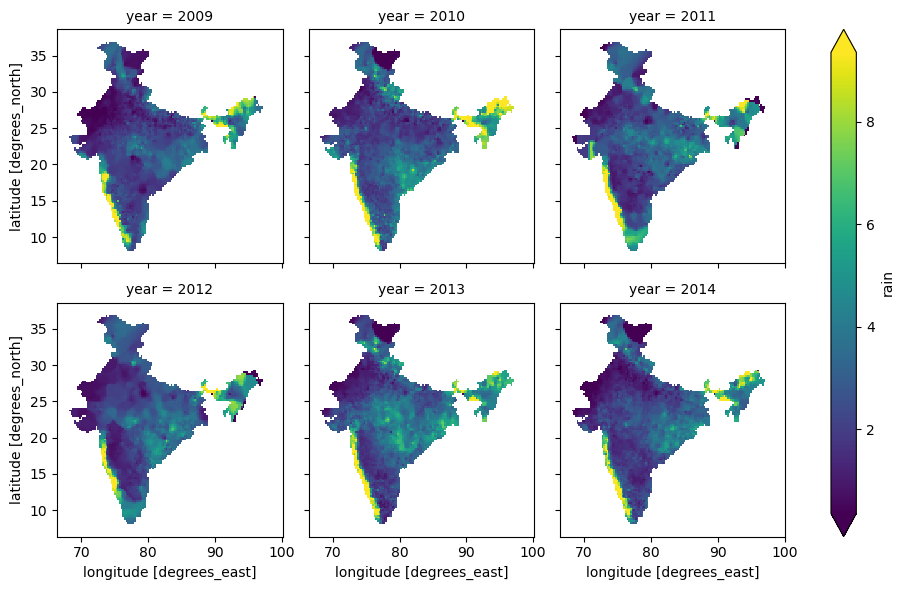

In [421]:
# Multi-year annual rainfall(mm/day) plot
imd_yearly = imd_rain2.groupby('time.year').mean('time')
imd_yearly.sel(year=slice('2009','2014')).plot(x='lon',y='lat',col='year',col_wrap=3,robust=True)

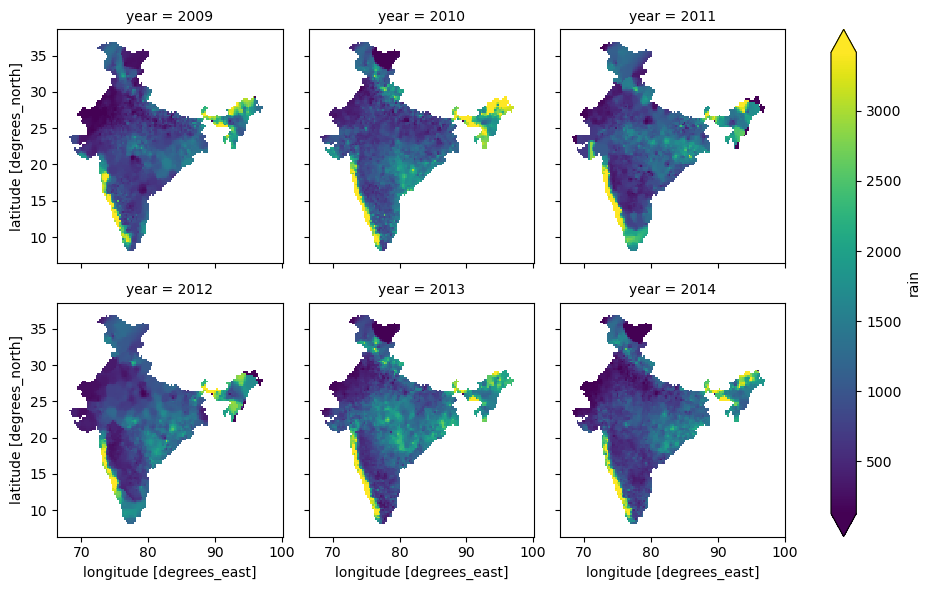

In [420]:
# Multi-year annual Total rainfall(mm) plot
imd_yearly_tot = imd_rain2.groupby('time.year').sum('time',min_count=1)
imd_yearly_tot.sel(year=slice('2009','2014')).plot(x='lon',y='lat',col='year',col_wrap=3,robust=True)

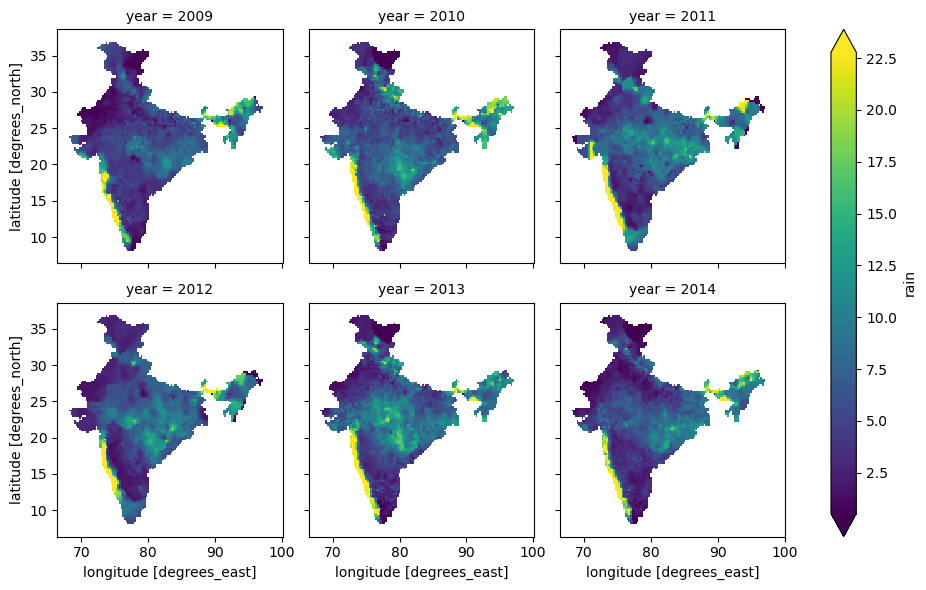

In [422]:
imd_jjas = imd_rain2.sel(time=is_jjas(imd_rain2['time.month'])).groupby('time.year').mean(dim='time')
imd_jjas.sel(year=slice('2009','2014')).plot(x='lon',y='lat',col='year',col_wrap=3,robust=True)

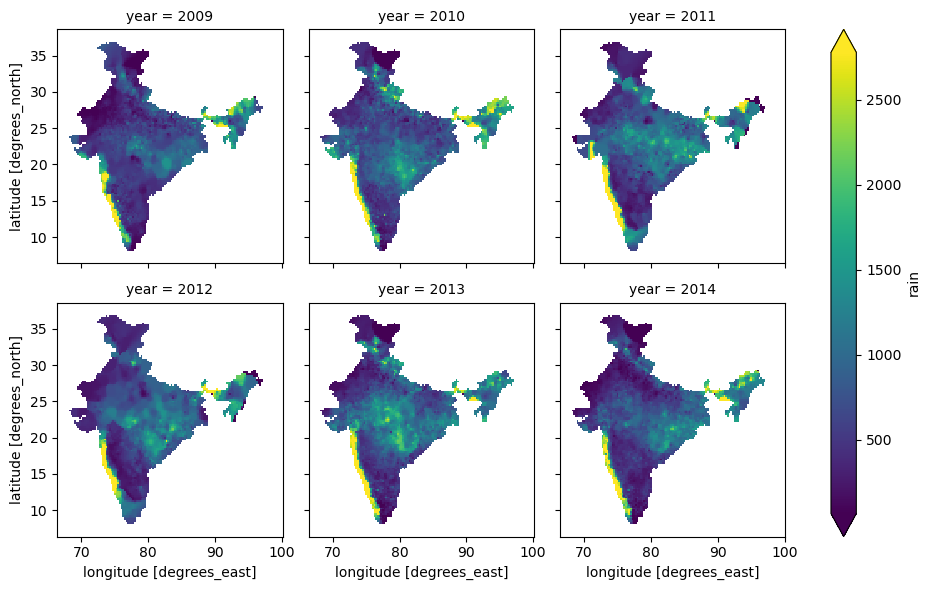

In [423]:
imd_jjas_tot = imd_rain2.sel(time=is_jjas(imd_rain2['time.month'])).groupby('time.year').sum(dim='time',min_count=1)
imd_jjas_tot.sel(year=slice('2009','2014')).plot(x='lon',y='lat',col='year',col_wrap=3,robust=True)